In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("ex1.txt",header=None)

Text(0.5, 1.0, 'Profit Prediction')

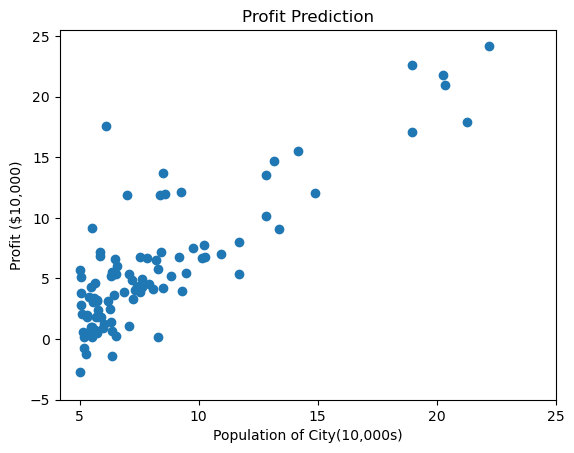

In [2]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City(10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

In [3]:
def computeCost(x,y,theta):
    m=len(y) #length of training data
    h=x.dot(theta) #hypothesis
    square_err=(h-y)**2
    return 1/(2*m) * np.sum(square_err) #returning J


In [4]:
data_n=data.values
m=data_n[:,0].size
x=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
computeCost(x,y,theta)

32.072733877455676

In [5]:
def gradientDescent(x,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        predictions = x.dot(theta) #hypothesis
        error = np.dot(x.transpose(),(predictions -y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(x,y,theta))
    return theta,J_history

In [6]:
theta,J_history  =gradientDescent(x,y,theta,0.01,1500)
print("h(x) = "+str(round(theta[0,0],2))+"+"+str(round(theta[1,0],2))+"x1")

h(x) = -3.63+1.17x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

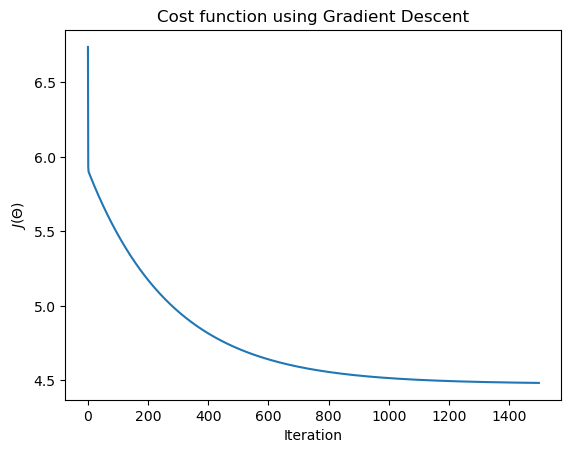

In [7]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit Prediction')

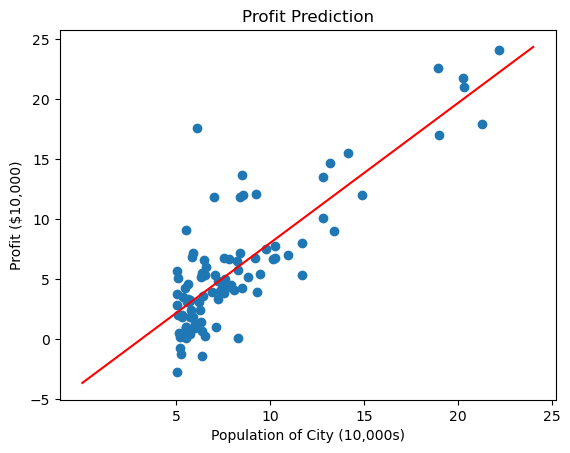

In [9]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="red")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

In [10]:
def predict(x,theta):
    #takes in numpy array of x and theta and return the predicted value of y based on theta
    predictions=np.dot(theta.transpose(),x)
    return predictions[0]

In [11]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [12]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $45342.0
